# Used-Cars

## Programming for Data Science Course from University of Science
## Final project

### Team members
<center>

|MEMBERS           |ID     |
|:-------------------|:-------|
|Vũ Minh Chiến        |22127045 |
|Quách Trần Quán Vinh |22127460 |

</center>

### **1. Collecting data**

What subject is your data about?
- Craigslist is the world's largest collection of used vehicles for sale, this dataset includes part of used vehicle entry within the United States on Craigslist.

What is the source of your data?
- The source of this data set can be found in [kaggle](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data). For this project, we have reduce the origin data set, which contains 426880 rows, down to 150000 rows (the reason for this will be mentioned in reflection part).

Do authors of this data allow you to use like this?
- Yes, this data set have `CC0: Public Domain` license (you can find more informaitons about the license [here](https://creativecommons.org/publicdomain/zero/1.0/)).

How did authors collect data?
- The arthor collect data by a web application built with Flask which scrapes used vehicle listings weekly from all regional Craigslist sites in the United States (you can find more informaitons on scraping process [here](https://github.com/AustinReese/UsedVehicleSearch)).

##### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer

##### Read the dataset

In [2]:
df = pd.read_csv('vehicles.zip', delimiter=',', compression='zip')

### **2. Exploring data**

In [3]:
# display 5 rows for visualize
df.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
48491,7310500618,https://longisland.craigslist.org/ctd/d/commac...,long island,https://longisland.craigslist.org,46495,2018.0,bmw,750i / b7,NaN,NaN,...,full-size,sedan,NaN,https://images.craigslist.org/00t0t_hN9IYoOGGw...,2018 BMW 7 Series 750i xDrive Offered by: ...,NaN,ny,40.845787,-73.265338,2021-04-21T15:36:15-0400
43620,7313548264,https://klamath.craigslist.org/ctd/d/lynnwood-...,klamath falls,https://klamath.craigslist.org,39999,2015.0,ram,3500 tradesman,NaN,6 cylinders,...,NaN,truck,NaN,https://images.craigslist.org/01313_eNAJ0L6MHG...,FREE SHIPPING TO OREGONASK US HOW IT WORKSCALL...,NaN,or,47.812470,-122.321640,2021-04-27T14:19:02-0700
23170,7315849404,https://desmoines.craigslist.org/cto/d/urbanda...,des moines,https://desmoines.craigslist.org,8500,2007.0,gmc,yukon,good,8 cylinders,...,full-size,SUV,grey,https://images.craigslist.org/00T0T_gXGzXo9nom...,"GMC Yukon SLT, 2007, Regular Title, Prior Salv...",NaN,ia,41.633000,-93.737000,2021-05-02T13:24:17-0500
70401,7316586576,https://raleigh.craigslist.org/ctd/d/summerfie...,raleigh / durham / CH,https://raleigh.craigslist.org,58961,2015.0,ford,f350 super duty platinum,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/01010_eq6l4z0HPI...,2015 FORD F350 SUPER DUTY PLATINUM CALL Brookb...,NaN,nc,36.224500,-79.890100,2021-05-03T23:47:11-0400
11758,7302849381,https://brownsville.craigslist.org/ctd/d/port-...,brownsville,https://brownsville.craigslist.org,7650,2013.0,buick,enclave,excellent,6 cylinders,...,mid-size,SUV,brown,https://images.craigslist.org/00t0t_fu3slBoiWm...,2013 BUICK ENCLAVE 6. CIL AUTOMATICA BUEN MOTO...,NaN,tx,25.950376,-97.321693,2021-04-06T16:59:29-0500


##### How many rows and columns are there in the dataset?

In [4]:
rows, cols = df.shape
print(f'Number of rows: {rows} \nNumber of columns: {cols}')

Number of rows: 100000 
Number of columns: 26


##### What is the meaning of each row/column?

- Each row corresponds to an used car with different attributes being sale.
- Columns meaning:
  - `id`: A unique identifier for each vehicle. Used to distinguish records in the dataset.
  - `url`: A **Craigslist** web address of the vehicle.
  - `region`: The geographic area where the vehicle is listed for sale.
  - `region_url`: A **Craigslist** web address for the region's page where the vehicle is listed..
  - `price`: Price of the vehicle.
  - `year`: The manufacturing year of the vehicle.
  - `manufacturer`: The brand or company that manufactured the vehicle.
  - `model`: The specific model of the vehicle.
  - `condition`: The state of the vehicle.
  - `cylinders`: The number of cylinders in the engine.
  - `fuel`: The type of fuel the vehicle uses.
  - `odometer`: The mileage of the vehicle at the time of listing.
  - `title_status`: The legal status of the vehicle's title (e.g., clean, salvage).
  - `transmission`: The type of transmission system (e.g., automatic, manual).
  - `VIN`: Vehicle Identification Number—a unique code assigned to every vehicle.
  - `drive`: The drivetrain type (e.g., front-wheel drive (FWD), rear-wheel drive (RWD)).
  - `size`: The physical size of the vehicle.
  - `type`: The vehicle's purpose or category (e.g., SUV, sedan, truck).
  - `paint_color`: The color of the vehicle's exterior paint.
  - `image_url`: The web address of an image showcasing the vehicle in the listing.
  - `description`: A textual description of the vehicle written by the seller.
  - `county`: The county where the vehicle is listed for sale.
  - `state`: The state where the vehicle is listed for sale.
  - `lat`: The latitude coordinate of the vehicle’s location.
  - `long`: The longitude coordinate of the vehicle’s location.
  - `posting_date`: The date this car has been post on the website.

##### Are there any duplicated rows?

In [5]:
if df.duplicated().sum() != 0:
    print("There are duplicate rows")
else:
    print('There aren\'t duplicate rows')

There aren't duplicate rows


##### What is the current data type of each column? Are there columns having inappropriate data types?

In [6]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

There are some inappropriate data type:
- `county`: name of a place $\rightarrow$ should be `object` type instead of `float64` type.

In [7]:
# Checking for distinct values
df['county'].unique()

array([nan])

Since all values of `county` column are missing, we remove this column from the dataset.

In [8]:
df.drop(columns='county', inplace=True)

- `posting_date`: indicates the date $\rightarrow$ should be `datetime` type instead of `object` type

In [9]:
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)

In [10]:
df['posting_date']

0       2021-04-17 14:03:43+00:00
1       2021-04-29 00:01:43+00:00
2       2021-04-28 16:13:23+00:00
3       2021-04-11 03:06:29+00:00
4       2021-04-14 20:46:17+00:00
                   ...           
99995   2021-04-28 13:31:13+00:00
99996   2021-05-02 14:51:35+00:00
99997   2021-04-14 20:53:27+00:00
99998   2021-04-12 17:20:51+00:00
99999   2021-04-28 13:00:22+00:00
Name: posting_date, Length: 100000, dtype: datetime64[ns, UTC]

##### With each numerical column, how are values distributed?

- Min? max? Are they abnormal?

In [11]:
numerical_features = df.select_dtypes('number').columns

min_vals = df[numerical_features].min(axis=0)
max_vals = df[numerical_features].max(axis=0)

min_max_numeric = pd.DataFrame({'min': min_vals, 'max': max_vals})
min_max_numeric

,min,max
id,7.209065e+09,7.317098e+09
price,0.000000e+00,3.009549e+09
year,1.900000e+03,2.022000e+03
odometer,0.000000e+00,1.000000e+07
lat,-4.923221e+01,7.786064e+01
long,-1.597199e+02,1.676299e+02


Min value of `price` is **0**, which is abnormal. Therefore, we can consider **0** as **missing values**. 

In [12]:
# Convert all zero values of price column to NaN
df['price'] = df['price'].replace(0, np.nan)

- What is the percentage of missing values?

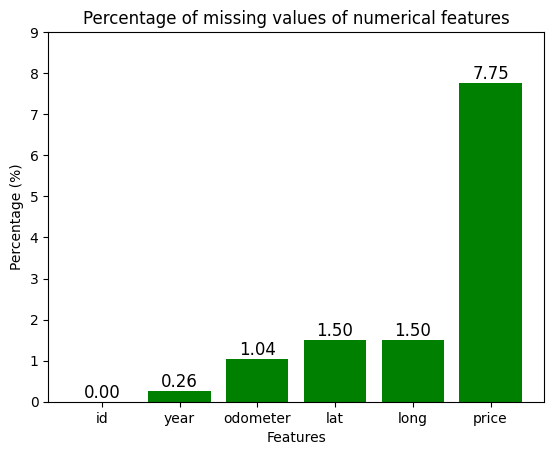

In [13]:
missing_numeric = df[numerical_features].isna().sum()/rows * 100
missing_numeric = missing_numeric.sort_values()

bars = plt.bar(missing_numeric.index, missing_numeric.values, color='green')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=12)
    
plt.ylim((0, 9))
plt.xlabel('Features')
plt.ylabel('Percentage (%)')
plt.title('Percentage of missing values of numerical features');

##### With each categorical column, how are values distributed?

- Visualize the missing values in catergorical columns

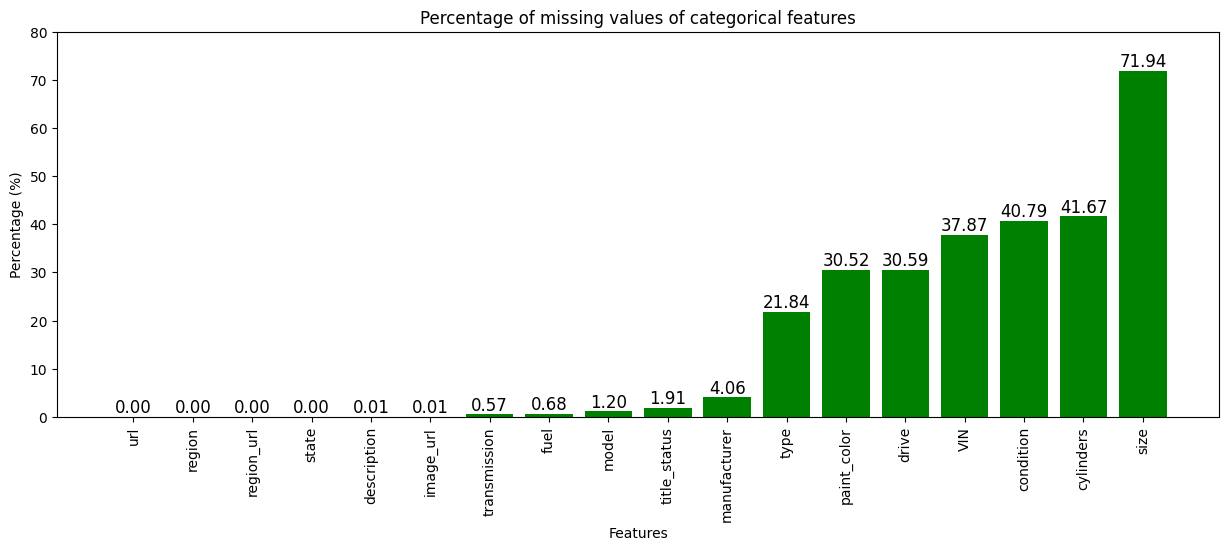

In [14]:
# get all object columns
object_features = df.select_dtypes('object').columns

# get the percentage of missing values
object_features_values = df[object_features].isna().sum()/rows * 100

# sort values in ascending order
object_features_values = object_features_values.sort_values(ascending=True)

# visualize the missing value with a bar chart
plt.figure(figsize=(15, 5))
bars = plt.bar(object_features_values.index, object_features_values.values, color='green')

# add notation to bar chart
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=12)

plt.ylim((0, 80))
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage (%)')
plt.title('Percentage of missing values of categorical features')
plt.show();

- The column `size` have a significant missing values so dropping this column is the best option

In [15]:
df.drop(columns='size', inplace=True)

#### Take a closer look into other columns

In [16]:
# get all object columns
object_features = df.select_dtypes('object').columns

df[object_features].describe().T

,count,unique,top,freq
url,100000,100000,https://zanesville.craigslist.org/ctd/d/carrol...,1
region,100000,403,columbus,847
region_url,100000,413,https://phoenix.craigslist.org,747
manufacturer,95945,42,ford,16660
model,98796,13749,f-150,1935
condition,59205,6,good,28320
cylinders,58332,8,6 cylinders,22137
fuel,99323,5,gas,83641
title_status,98091,6,clean,94927
transmission,99429,3,automatic,79021


- Here we can see all the values with highest appearances in each categorical columns. All the columns seem normal except one,  `VIN` columns must have a unique code for each cars, but here we get 59 cars with the same `VIN`, but as we have seen above there aren't any duplicate rows in this dataset so it a little bit of confuse here. So here we can delete the columns `VIN` as well, the reason is we already have the columns `id` with 100.000 distinct values for indentify each cars, moreover this column doesn't show much informaiton for analyzing.

In [17]:
df.drop(columns='VIN', inplace=True)

### **3. Asking meaningful questions**

##### **What factors most significantly impact used car prices?**
- This give us the insight of how each features affect the car pricing. The sellers can base on this to decide the price of the car which they want to sell to make the most of it.
- For buyers, this can help to determine how valuable a car is before buying it, this can help prevent buying bad cars with crazy price.

##### **What is the common trend of all sold cars (manufacturer, year, odometer,...)? What it says about the used cars in American?**
- Knowing the habbit of customers can help the sellers focus on what the customers are looking for so as to push the consumptions.
- The manufacturers can base on this to adjust their products to fit with more people.

### **4. Preprocessing + analyzing data to answer each question**

First we need to remove duplicate columns, `region` and `region_url` are duplicated so we will remove `region_url`.

In [18]:
df.drop(columns='region_url', inplace=True)

Here we only focus on analyzing the main features that affect the cars prices most so all the redundant features such as: 
- `url`: the url to the website is useless here because it does affect the car price nor the trend of sold cars. 
- `image_url`: of course customer want to see how the car looks like, but the image_url itself doesn't have any value for analyzing. 
- `lat` and `long`: these values are quite special, they represent the specific location of where the car is. But here, we already have the value `region` instead so we could ignore these values.
- `description`: this column does not give any useful information for analyzing.

In [19]:
df.drop(columns=['url', 'image_url', 'lat', 'long', 'description'], inplace=True)

The dataset have many missing value, so we need to deal with it first. Lets look at the percentage of missing values until now.

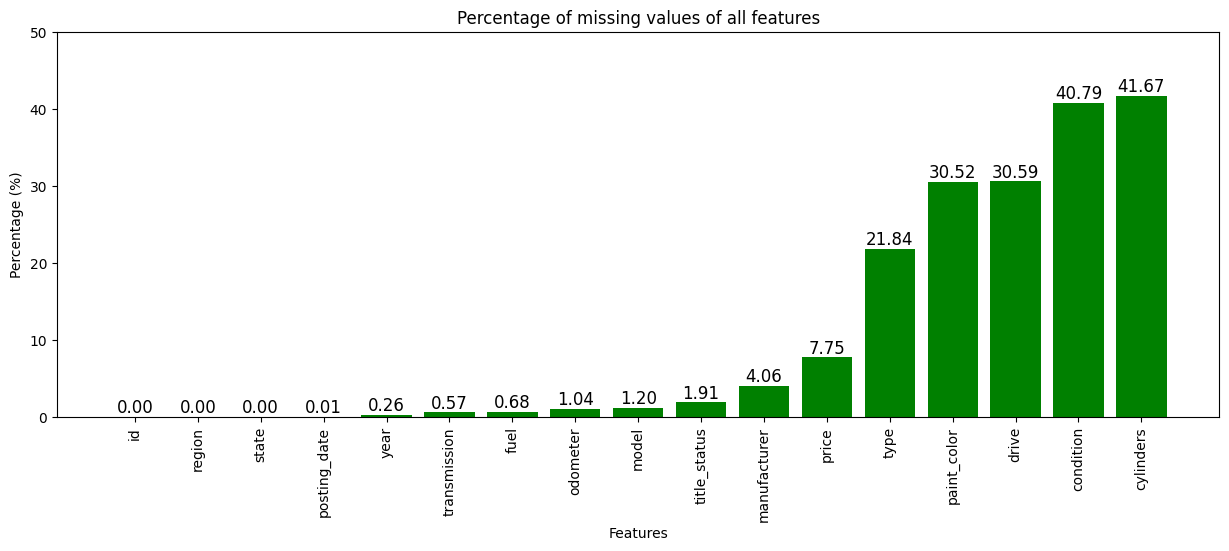

In [20]:
# get the percentage of missing values
missing_percent = df[df.columns].isna().sum()/rows * 100

# sort values in ascending order
missing_percent = missing_percent.sort_values(ascending=True)

# visualize the missing value with a bar chart
plt.figure(figsize=(15, 5))
bars = plt.bar(missing_percent.index, missing_percent.values, color='green')

# add notation to bar chart
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=12)

plt.ylim((0, 50))
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage (%)')
plt.title('Percentage of missing values of all features')
plt.show();

Firstly, we need to observe the distribution to decide which method to use.

##### **Numerical features**

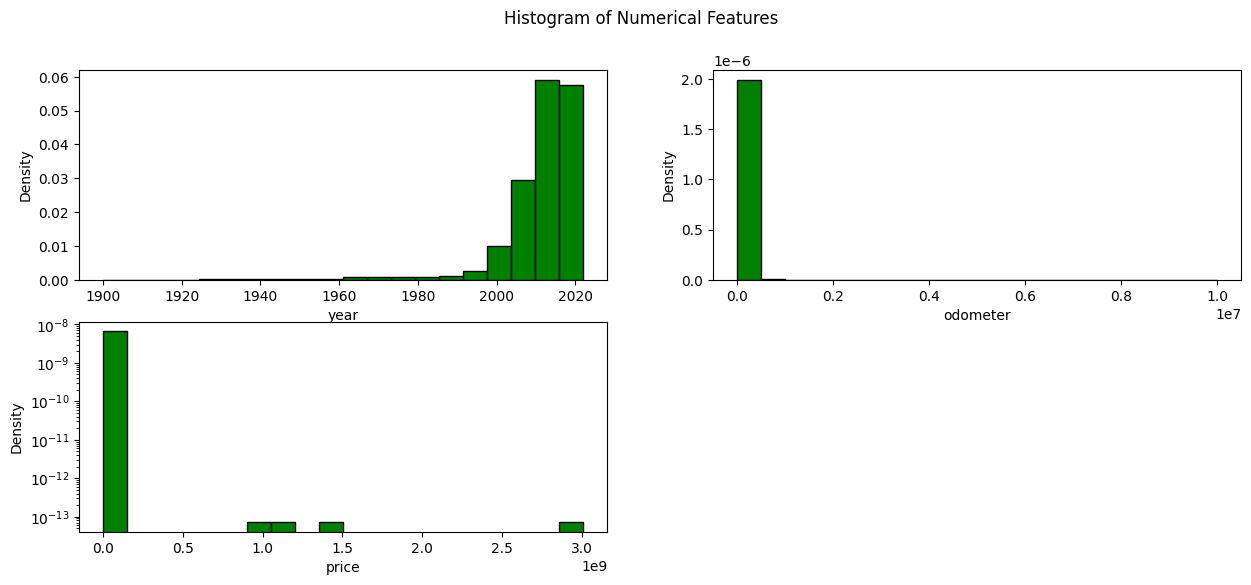

In [21]:
num_missing = missing_percent[missing_percent > 0].index.intersection(numerical_features)

fig, axes = plt.subplots((num_missing.size+1)//2, 2, figsize=(15, 6))
axes = axes.flatten()

for i, feature in enumerate(num_missing):
    axes[i].hist(df[feature], bins=20, density=True, color='green', edgecolor='black')
    axes[i].set_ylabel('Density')
    axes[i].set_xlabel(feature)

for j in range(num_missing.size, len(axes)):
    fig.delaxes(axes[j])

axes[2].set_yscale('log')
axes[3].set_yscale('log')

fig.suptitle('Histogram of Numerical Features');

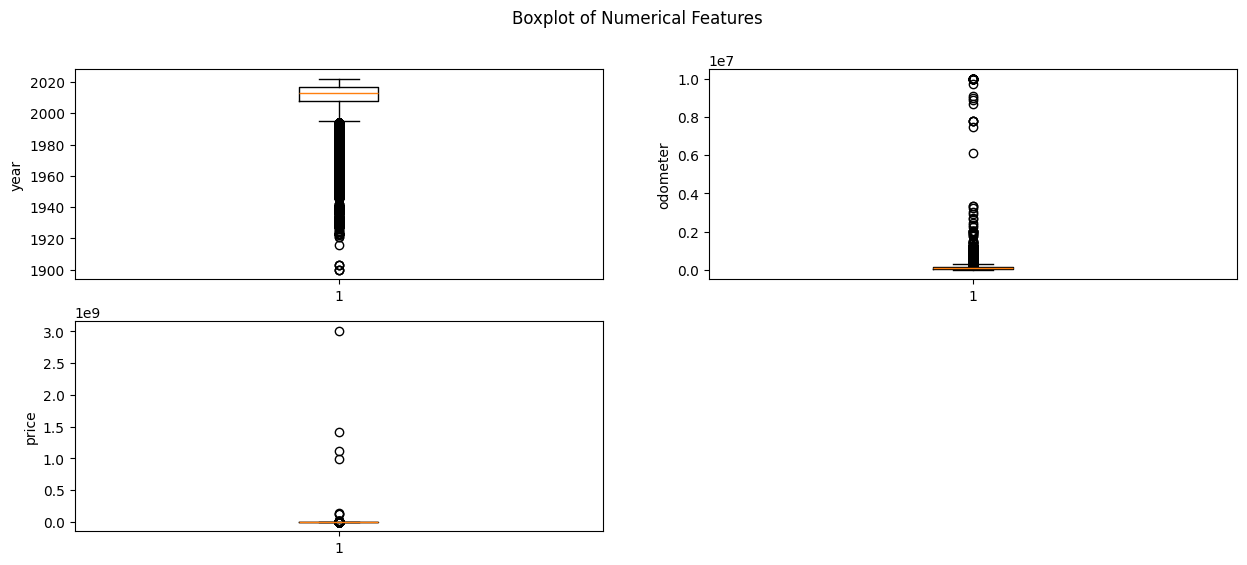

In [22]:
fig, axes = plt.subplots((num_missing.size+1)//2, 2, figsize=(15, 6))

axes = axes.flatten()

for i, feature in enumerate(num_missing):
    axes[i].boxplot(df[feature].dropna())
    axes[i].set_ylabel(feature)

for j in range(num_missing.size, len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle('Boxplot of Numerical Features');

- `odometer` and `Price`: Highly left-skewed distribution with heavy presence of outliers. So that we impute **median** value instead of **mean** to avoid the influence of outliers.
- `year`: Relatively less skewed with clear bounds (e.g. around **1980**) and some extreme outliers. Since vehicle years are often repetitive, imputing missing values with the **most frequent value (mode)** is appropriate.
- `posting_date`: Left-skewed distribution without outliers. Similar with `year`, we can impute **mode** since the repetitive posting date is appropriate.

In [23]:
df[['odometer', 'price']] = df[['odometer', 'price']].fillna(df[['odometer', 'price']].median().iloc[0])
df[['year', 'posting_date']] = df[['year', 'posting_date']].fillna(df[['year', 'posting_date']].mode().iloc[0])

##### **Categorical features**

For categorical features, we decide to manually impute missing values to the **low proportions (under 20%)** of missing values features and apply classification algorithm for the **higher proportions (over 20%)**.

##### Under 20% features
As always, we oberve the distribution first then take the decision.

In [24]:
missing_percent[(missing_percent < 20) & (missing_percent > 0)].index.difference(num_missing)

Index(['fuel', 'manufacturer', 'model', 'posting_date', 'title_status',
       'transmission'],
      dtype='object')

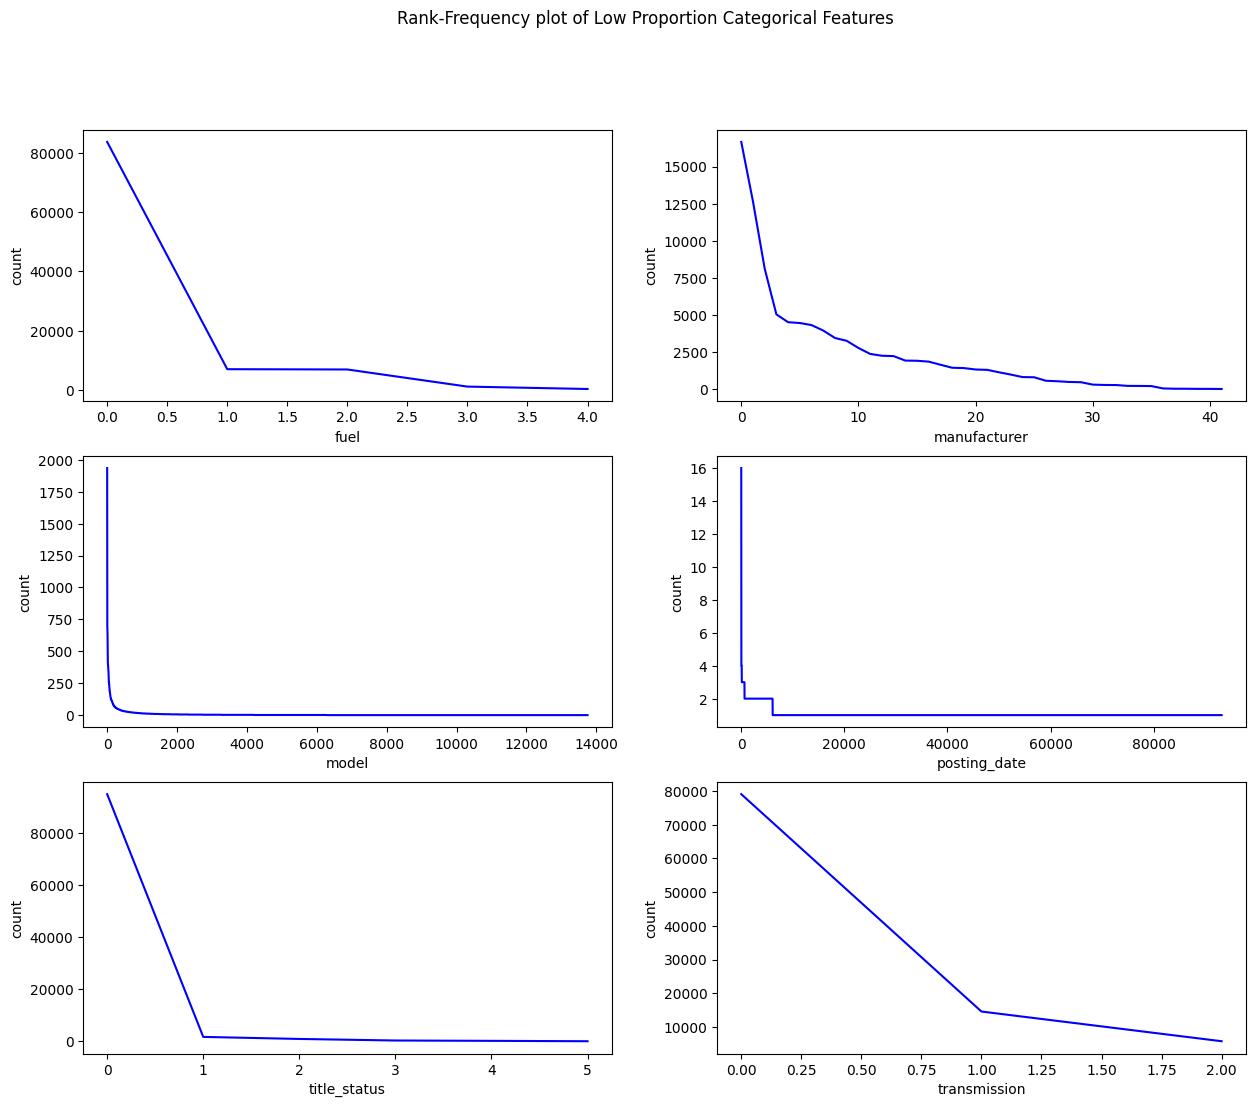

In [25]:
lower_cate_missing = missing_percent[(missing_percent < 20) & (missing_percent > 0)].index.difference(num_missing)

fig, axes = plt.subplots((lower_cate_missing.size+1)//2, 2, figsize=(15,(lower_cate_missing.size+1)//2 * 4))
axes = axes.flatten()

for i, feature in enumerate(lower_cate_missing):
    val_counts = df[feature].value_counts()
    axes[i].plot(range(val_counts.size), val_counts.values, color='blue')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('count')
    
for j in range(lower_cate_missing.size, len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle('Rank-Frequency plot of Low Proportion Categorical Features');

- `fuel`, `transmission`, `manufacturer` and `title_status`: There is a clear dominance of one category (high frequency at rank 0), **mode** imputation is the best choice.
- `model`: Imputation with **global constant**(e.g. Unknown, ...) may make more sense, because the count drops sharply and there are many low-frequency values.

In [26]:
mode_imputation_features = lower_cate_missing.difference(['model'])

df[mode_imputation_features] = df[mode_imputation_features].fillna(df[mode_imputation_features].mode().iloc[0])
df['model'] = df['model'].fillna('Unknown')

##### Over 20% features

Since the proportions of missing values of these features exceed 20%, applying **classification imputation** will be more precise. In this project, we will use **KNN** for predicting the missing values.

First we need to apply target `Ordinal Encoding` to convert all the categorical data to numeric. As **KNN** algorithm doesn't support categorical type. But before that we must see if there are any values that have the same counts.

The reason for choosing `Ordinal Encoding` because this dataset doesn't have the specific target for `Target Encoding` and some values also have the same count so `Count Encoding` can't be used either. Moreover, this dataset is too large to use `One-Hot Encoding` or `Dummy encoding`

In [27]:
# get the clumns with missing values
missing_cols = df.columns[df[df.columns].isna().any()]

missing_cols

Index(['condition', 'cylinders', 'drive', 'type', 'paint_color'], dtype='object')

In [28]:
# create a copy
df_encoding = df.copy()

# conveert posting date to str type
df_encoding['posting_date'] = df['posting_date'].astype(str)

# get the categorical columns 
cate_cols = []
for col in df_encoding.columns:
    if df_encoding[col].dtype == 'object':
        cate_cols.append(col)

cate_cols

['region',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state',
 'posting_date']

There are 13 columns needs to be observed.

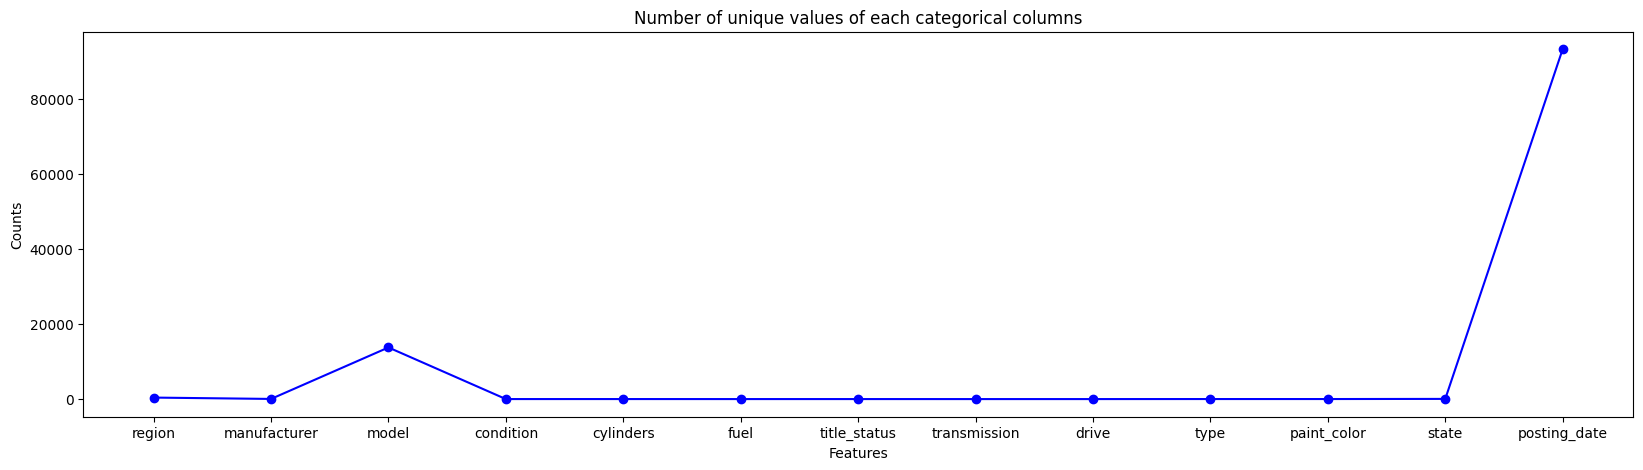

In [29]:
# count the number of unique values
unique_count = {}
for col in cate_cols:
    unique_count[col] = len(df[col].unique())

# visualize
plt.figure(figsize=(20, 5))
plt.plot(unique_count.keys(), unique_count.values(), 'bo-')
plt.ylabel('Counts')
plt.xlabel('Features')
plt.title('Number of unique values of each categorical columns')
plt.show();

No need to discuss `posting_date` only the number of `model` is nearly 20000 values, so we can see how big the matrix will if we apply `Onehot Encoding`.

In [30]:
# find if there are any values have the same count
for col in cate_cols:
    duplicate = df[col].value_counts()
    if duplicate.duplicated().any():
        print(f'{col} have {duplicate[duplicate.duplicated()].size} duplicate counts')
        break

region have 144 duplicate counts


`region` have 144 duplicated counts so we cant use `Count Encoding` for it.

Now apply `Ordinal Encoding` on the dataset.

In [31]:
for col in cate_cols:
    # store the ordinal of values
    ordinal = {}
    # get all unique values except nan
    unique = df[col][~df[col].isna()].unique()
    
    # get the ordival of each value
    for i, val in enumerate(unique):
        ordinal[val] = i

    # convert categorical to ordinal
    df_encoding[col] = df[col].map(ordinal).astype(float)

Check if the ending works.

In [32]:
df_encoding.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date
3577,7316017400,11.0,33989.0,2011.0,22.0,594.0,NaN,1.0,0.0,87490.0,0.0,0.0,2.0,3.0,4.0,11.0,3535.0
84824,7307285533,338.0,44990.0,2014.0,22.0,895.0,0.0,1.0,0.0,39525.0,0.0,0.0,2.0,6.0,0.0,32.0,79750.0
38371,7306742935,151.0,5500.0,2012.0,11.0,298.0,2.0,2.0,0.0,99000.0,0.0,0.0,1.0,5.0,8.0,20.0,37116.0
32485,7315303436,126.0,9750.0,2011.0,26.0,1193.0,1.0,0.0,0.0,117000.0,0.0,0.0,0.0,2.0,3.0,8.0,31523.0
54938,7313665389,218.0,11999.0,2013.0,5.0,1219.0,1.0,2.0,0.0,147704.0,0.0,0.0,NaN,3.0,0.0,13.0,52610.0


Now apply `KNN` for imputating.

In [33]:
# create an imputer
imputer = KNNImputer(weights= 'distance' , metric= 'nan_euclidean')

# fit on the dataset
imputer.fit(df_encoding)

# transform the dataset
df_encoding = imputer.transform(df_encoding)

print('Missing: %d' % sum(np.isnan(df_encoding).flatten()))

Missing: 0


Looks like the filling value (float number) isn't match with the ordinal (interger) so we will round it up to the nearest interger. 

In [34]:
df_encoding = np.ceil(df_encoding)

Convert from ordinal back to categorical

In [35]:
# convert numpy array to pandas
df_encoding = pd.DataFrame(df_encoding, columns=df.columns)

# update the missing cols
for col in missing_cols:
    # store the ordinal of values
    ordinal = {}
    # get all unique values except nan
    unique = df[col][~df[col].isna()].unique()
    
    # get the ordival of each value
    for i, val in enumerate(unique):
        ordinal[i] = val

    # convert categorical to ordinal
    df[col] = df_encoding[col].map(ordinal).astype(str)

Check if there still any missing values.

In [36]:
df.isna().any()

id              False
region          False
price           False
year            False
manufacturer    False
model           False
condition       False
cylinders       False
fuel            False
odometer        False
title_status    False
transmission    False
drive           False
type            False
paint_color     False
state           False
posting_date    False
dtype: bool

All values have been filled.

### **5. Reflection**

### **6. References**

- [KNN imptation](https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/)